# Problem Statement

## In this assignment, I will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

### A look at the data

<p>Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season. </p>
<p>Download 'nba_2013.csv' file from this link: https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 </p>
<p>Here are some selected columns from the data:</p>
<ul><li>player - name of the player</li>
<li>pos - the position of the player</li>
<li>g - number of games the player was in</li>
<li>gs - number of games the player started</li>
<li>pts - total points the player scored</li></ul>
<p>There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation
of the rest of them.</p>

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading Data

In [2]:
#Reading data from downloaded CSV file.
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

## Data Exploration/Analysis

In [3]:
nba.columns.values #The names of all the columns in nba dataframe.

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [4]:
nba.shape #Return a tuple representing the dimensionality of nba DataFrame.

(481, 31)

In [5]:
nba.head() #Returns the first 5 rows of nba dataframe.

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
nba.info() #Prints information about nba dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [7]:
nba.describe() #The summary statistics of the nba dataframe

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [8]:
nba.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [9]:
#Shows percentage of data column wise missing in nba dataframe.
total = nba.isnull().sum().sort_values(ascending=False)
percent_1 = nba.isnull().sum()/nba.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
x3p.,67,13.9
ft.,20,4.2
x2p.,3,0.6
fg.,2,0.4
efg.,2,0.4
x2p,0,0.0
pos,0,0.0
age,0,0.0
bref_team_id,0,0.0
g,0,0.0


<p>There are missing data in x3p. ,ft. ,x2p. ,fg. and efg.	columns.</p>

## Data Visualization

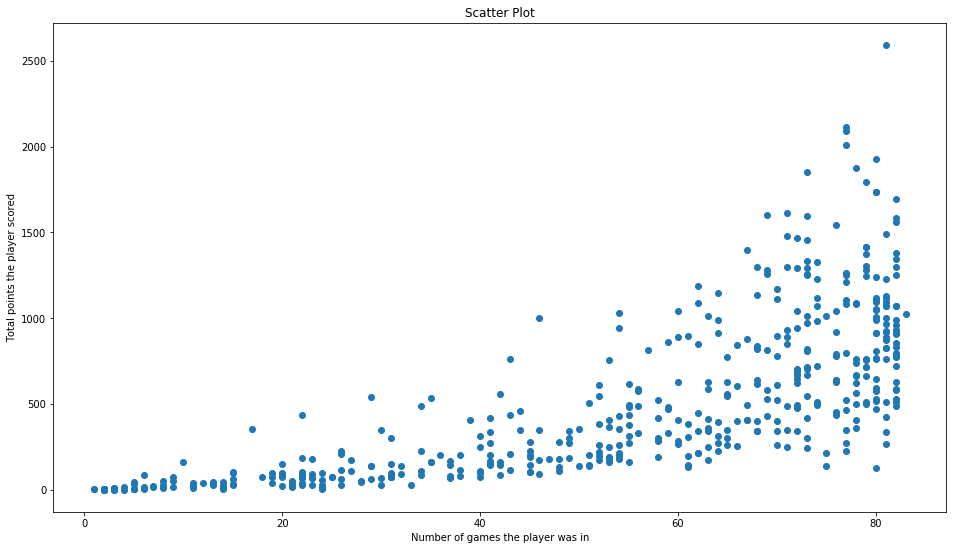

In [10]:
#Scatter Plot of "number of games the player was in" and "total points the player scored"
plt.figure(figsize=(16,9))
plt.title("Scatter Plot")
plt.xlabel("Number of games the player was in")
plt.ylabel("Total points the player scored")
plt.scatter(nba['g'],nba['pts'])
plt.show()

(array([19., 13.,  9.,  6.,  8.,  6., 10., 13., 13.,  9., 14.,  3.,  8.,
         8., 12., 10., 12., 10., 11., 23., 10., 16., 15., 18., 21., 31.,
        26., 27., 49., 51.]),
 array([ 1.        ,  3.73333333,  6.46666667,  9.2       , 11.93333333,
        14.66666667, 17.4       , 20.13333333, 22.86666667, 25.6       ,
        28.33333333, 31.06666667, 33.8       , 36.53333333, 39.26666667,
        42.        , 44.73333333, 47.46666667, 50.2       , 52.93333333,
        55.66666667, 58.4       , 61.13333333, 63.86666667, 66.6       ,
        69.33333333, 72.06666667, 74.8       , 77.53333333, 80.26666667,
        83.        ]),
 <a list of 30 Patch objects>)

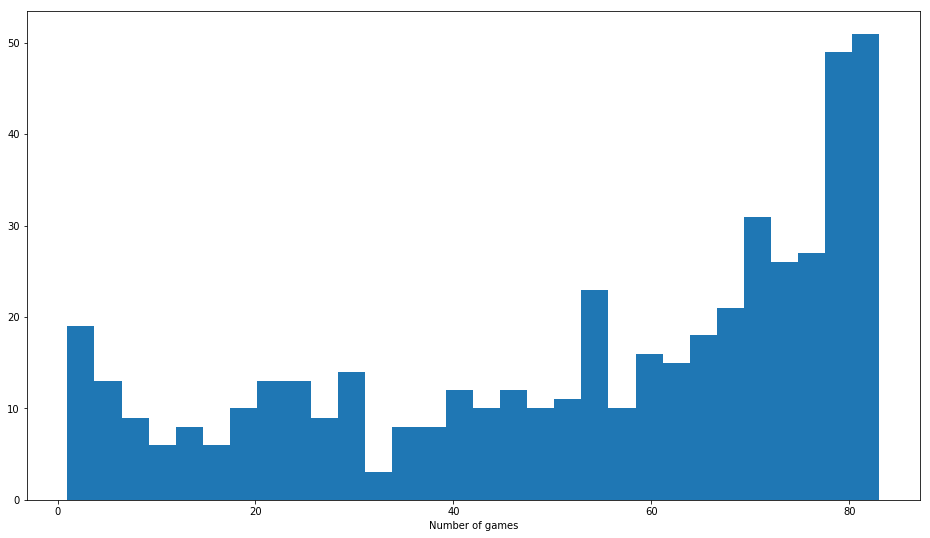

In [11]:
#Histogram Plot of Number of games
plt.figure(figsize=(16,9))
plt.xlabel("Number of games")
plt.hist(nba['g'],bins=30)

(array([101.,  49.,  41.,  32.,  33.,  28.,  23.,  22.,  19.,  22.,  21.,
         15.,  22.,   6.,  15.,   8.,   5.,   3.,   5.,   1.,   3.,   2.,
          1.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.        ,   86.43333333,  172.86666667,  259.3       ,
         345.73333333,  432.16666667,  518.6       ,  605.03333333,
         691.46666667,  777.9       ,  864.33333333,  950.76666667,
        1037.2       , 1123.63333333, 1210.06666667, 1296.5       ,
        1382.93333333, 1469.36666667, 1555.8       , 1642.23333333,
        1728.66666667, 1815.1       , 1901.53333333, 1987.96666667,
        2074.4       , 2160.83333333, 2247.26666667, 2333.7       ,
        2420.13333333, 2506.56666667, 2593.        ]),
 <a list of 30 Patch objects>)

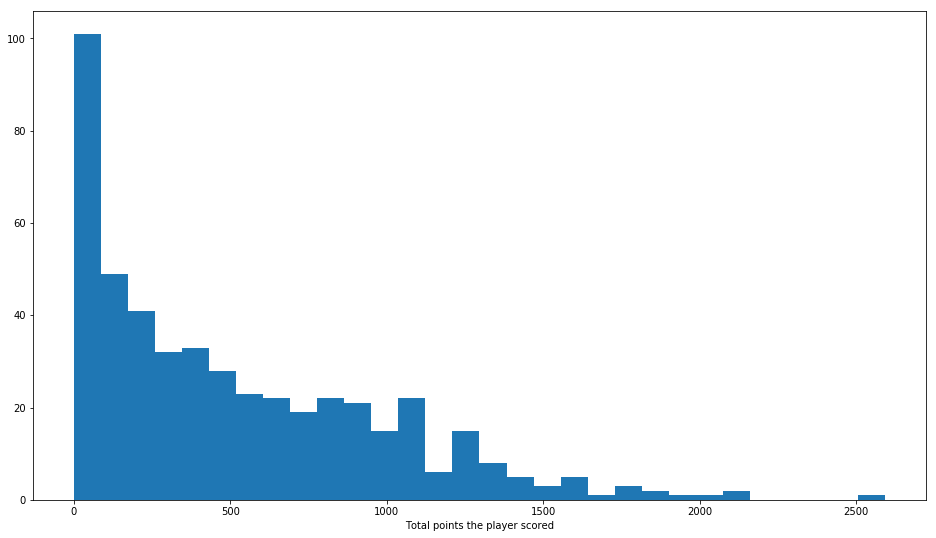

In [12]:
#Histogram Plot of Total points the player scored
plt.figure(figsize=(16,9))
plt.xlabel("Total points the player scored")
plt.hist(nba['pts'],bins=30)

## Data Imputation

In [13]:
#Replacing null values with '0'
nba_new = nba.fillna(0)

In [14]:
nba_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [15]:
#Dropping player, bref_team_id and season columns
nba_new.drop(["player","bref_team_id", "season"], axis=1, inplace=True)

In [16]:
#Converts categorical column 'pos'  data into dummy variables
nba_df = pd.get_dummies(data=nba_new,columns=["pos"])

### Train, Test & Split

In [17]:
#Selecting features and target
X=nba_df.drop("pts",axis=1)
y=nba_df.pts

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(X_train.shape) #Training data shape (predictor values) : 70%
print(X_test.shape) #Test data shape (predictor values) : 30%
print(y_train.shape) #Training data shape (target values) : 70%
print(y_test.shape) #Test data shape (target values) : 30%

(336, 33)
(145, 33)
(336,)
(145,)


### Creating and Training the Model

In [19]:
#Instantiating learning model (k = 5)
knn = KNeighborsRegressor(n_neighbors=5)

#Fitting the model
knn.fit(X_train, y_train)


### Predicting "total points the player scored" using Test Data

In [ ]:
#Predicting "total points the player scored" using test data set
pred = knn.predict(X_test)

In [20]:
#Prints first five predicted "total points the player scored" values 
print(pred[:5])

[561.  456.8 184.8 142.8  23.2]


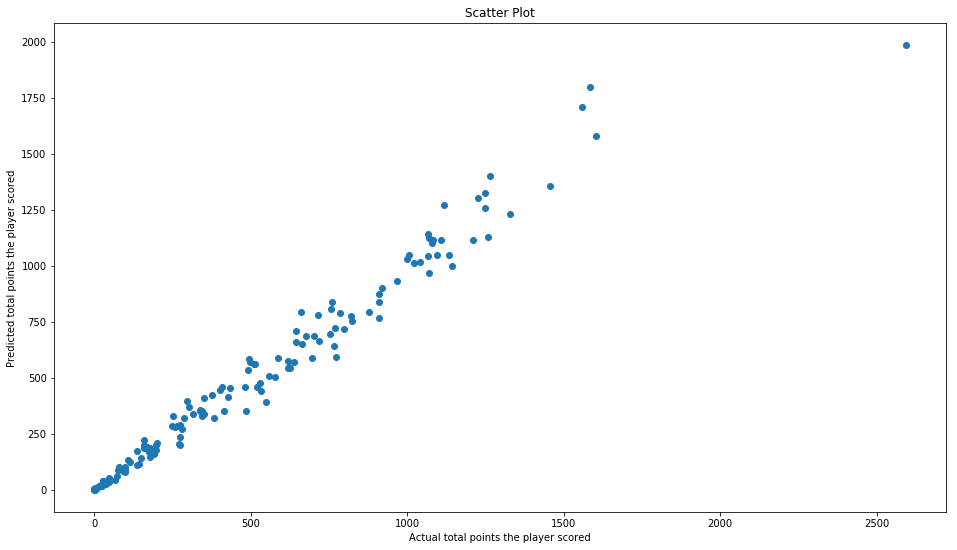

In [21]:
#Scatter Plot of "Actual total points the player scored" and "Predicted total points the player scored"
plt.figure(figsize=(16,9))
plt.title("Scatter Plot")
plt.xlabel("Actual total points the player scored")
plt.ylabel("Predicted total points the player scored")
plt.scatter(y_test,pred)
plt.show()

### Evaluating the model

In [22]:
#Caluculating and printing RMSE value for the model
print(np.sqrt(mean_squared_error(y_test,pred)))

79.84875012516929
